# Linear Regression I: Homework

### Question 1:

We have used the following code to generate different datasets with the same underlying properties but different noise ($\epsilon$). 

To change the noise but not the underlying function, we have set `NumPy`'s `random.seed` to a different value (e.g., 42, 100, 34, etc). 

Each different random seed generated a slightly different dataset for us. Using this approach each dataset is generated using the same underlying function (a quadratic). 

In practice, all datasets are generated using the same properties of the function, such as, the min and max `x` data, the same number of datapoints (20) and the same scale of noise (the noise will be different but the scale of the noise will be the same, set to 5 in the code below). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.linspace(-5, 5, num=20)
y = 2*x**2 - x + 1 + np.random.normal(scale=5, size=len(x))

Your task is to use and modify that code above so as to generate 20 datasets with different noise characteristics, yet generated using the same underlying function. 

For each dataset:

* Fit it with line and compute SSE
* Fit it with parabola and compute SSE
* Fit it with 12th-order polynomial and computet the SSE
* For each type of model used to fit the datasets, make a plot of the mean and STD of the SSEs obtained across all datasets.
* Describe the result obtained also making sure to answer the following questions:
    * Which model fit has a smaller SSE on average?
    * Which model has a more variable SSE across repeats? Why?

Make sure you are approaching your coding using the best practices learned in class so far. Make proficient use of function definitions so as to limite repetitions in your code.

### Question 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


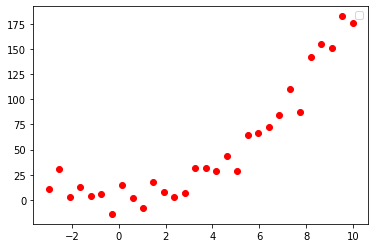

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(30)
x = np.linspace(-3, 10, num=30)
y = 2*x**2 - x + 1 + np.random.normal(scale=9, size=len(x))

plt.scatter(x,y, color='red')
plt.legend()
plt.show()

#### Q 2.1

Fit the dataset using a:
* second order polynomial (save the coefficients of this model in variable `q_coeffs`)
* third order polynomial (save the coefficients of this model in variable `t_coeffs`)
* Compute the SSE for each model and determine which model is better, motivate your choice with numbers, text and plots.

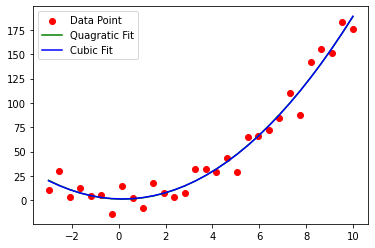

the quadratic model SSE is 3428.0929175646243 .
the cobic model SSE is 3426.676260423882 .
It looks like both regression lines have the value SSE value, which means that quadratice line (lower rank) is good enought to describe the trend of the data.


In [4]:
# Regression Line
# Second Order
q_coeffs = np.polyfit(x, y, deg=2)
quadratic_fit = np.polyval(q_coeffs, x)
# Third Order
t_coeffs = np.polyfit(x, y, deg=3)
cubic_fit = np.polyval(t_coeffs, x)

# Plot
plt.scatter(x,y, color='red', label = 'Data Point')
plt.plot(x, quadratic_fit, color = 'green', label = 'Quagratic Fit')
plt.plot(x, cubic_fit, color = 'blue', label = 'Cubic Fit')
plt.legend()
plt.show()

# SSE
def sse(y_hat, y):
    # Compute the Sum of Squared Errors (SSE)
    sse = sum( (y-y_hat)**2 )
    return sse

# Analysis
quadratic_sse = sse(quadratic_fit, y)
print("the quadratic model SSE is", quadratic_sse, ".")

cubic_see = sse(cubic_fit, y)
print("the cobic model SSE is", cubic_see, ".")

print('It looks like both regression lines have the value SSE value, which means that quadratice line (lower rank) is good enought to describe the trend of the data.')

#### Q 2.2

Let's now create a new x for us:

In [5]:
x_new = np.linspace(-10, 10, num=30)
y_new = 2*x**2 - x + 1 + np.random.normal(scale=5, size=len(x))

Your task is to use `q_coeffs` and `t_coeffs` in combination to this new `x_new` values to evaluate the model outside of the original range of the data (Hint: You should cosinder using  `polyval` to implement this).

Note that above we are asking you to evaluate the original model fit within a certain range of x-values onto a new range of values. In a certain ways, we are asking you to use the models to make predictions of data outside of the original range of values. You are predicting data really **out there**!

Next, do the following:
* Plot the orginal x and the orignal y (the orignal data) as black symbols.
* Using different colors, plot on top of the same figure, the models fit over the new range of values (the models used to make the prediction). [Just to make sure, this plot should have data plus two curves]
* Describe what you see:
    * do both model seem reasonably good at making the prediction?
    * which model seems better and why?
    * which model had a better SSE? 
    * is the result with the SSE consistent with what it appears here from the plot?
    * how do you interpret what it is going on here?


In [6]:
# Function for Regression Line 1-20
def regession(x,y):
    fit_result = []
    for i in range(20):
        coeffs = np.polyfit(x, y, deg = i+1) # i = 0 is the same as deg = 1 (base)
        fit = np.polyval(coeffs, x)
        fit_result.append(fit)
    return fit_result
    

In [8]:
# Function for Regession Line Plot
def regression_line(x_ori,y_ori,x_new,y_new):
    plt.scatter(x_ori,y_ori, color='black', label = 'Old Data Point') 
    plt.scatter(x_new,y_new, color='Red', label = 'New Data Point') 
    regression_plot = regession(x_new,y_new)
    plot_array = []
    for j in range(20):
        plot = plt.plot(x_new, regression_plot[j], label = '{0} Order'.format(j+1))
        plot_array.append(plot)
    return plot_array

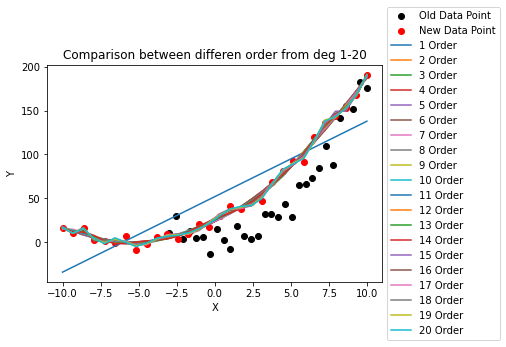

In [9]:
# Plot
regression_line = regression_line(x,y,x_new,y_new)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Comparison between differen order from deg 1-20')
plt.show()

In [10]:
# SSE Function
def SSE(x,y):
    SSE_list = []
    # Compute the Sum of Squared Errors (SSE)
    regression_fit = regession(x,y)
    for i in range(len(regression_fit)):
        SSE = sum((y-regression_fit[i])**2)
        SSE_list.append(SSE)
    return SSE_list

for p in range(len(SSE(x_new,y_new))):
    print('SSE for {0} Order is {1:.2f}.'.format(p+1, SSE(x_new,y_new)[p]))

SSE for 1 Order is 20014.62.
SSE for 2 Order is 799.98.
SSE for 3 Order is 799.80.
SSE for 4 Order is 799.48.
SSE for 5 Order is 791.85.
SSE for 6 Order is 781.81.
SSE for 7 Order is 722.59.
SSE for 8 Order is 679.12.
SSE for 9 Order is 666.21.
SSE for 10 Order is 663.28.
SSE for 11 Order is 661.22.
SSE for 12 Order is 648.31.
SSE for 13 Order is 638.16.
SSE for 14 Order is 626.69.
SSE for 15 Order is 449.67.
SSE for 16 Order is 406.48.
SSE for 17 Order is 352.37.
SSE for 18 Order is 333.91.
SSE for 19 Order is 312.63.
SSE for 20 Order is 290.34.


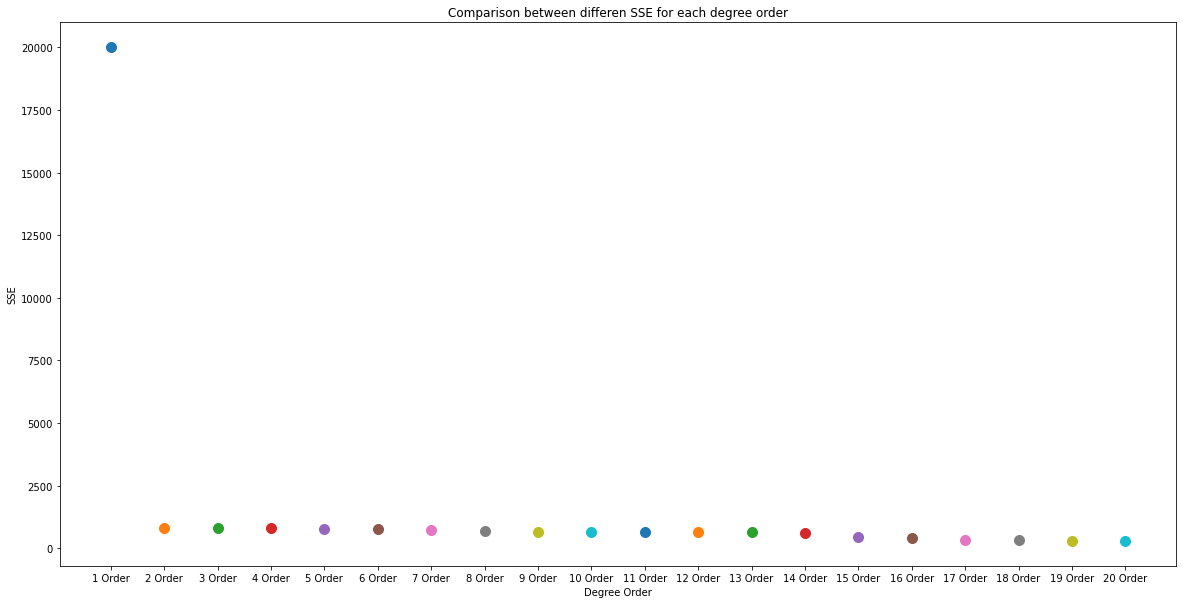

In [35]:
# Create X-axis for SSE
SSE_X = []
for g in range(len(SSE(x_new,y_new))):
    x_sse = '{0} Order'.format(g+1)
    SSE_X.append(x_sse)
    
plt.figure(figsize=(20,10))
for q in range(len(SSE_X)):
    plt.scatter(x = SSE_X[q],y = SSE(x_new,y_new)[q], s = 100);
plt.xlabel('Degree Order')
plt.ylabel('SSE')
plt.title('Comparison between differen SSE for each degree order');

`As being illustraed by SSE value, the best regrssion line for this plot is when deg = 20 because it has the least SSE value of 290. The SSE consists with the plot because deg of 20 appears to fit with every data of in the plot. Also, as the deg increase, the lower SSE value could be.`